
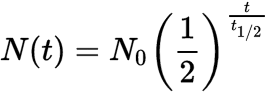

Let N<sub>0</sub> = 1

for reference, this was scraped from [here](https://sites.astro.caltech.edu/~dperley/public/isotopetable.html)

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
plt.rcParams['figure.figsize'] = [10, 10]

In [ ]:

def generate_for_element(tau, time_intervals, name):
  times = []
  N_t = []
  for i in range(time_intervals):
    times.append(i*100)
  for time in times:
    N_t.append(np.exp(-time/tau))
  d = {'t': times, 'n_of_t': N_t}
  df = pd.DataFrame(data=d, dtype=float)
  df.name = name
  return df

def get_path(name):
  path = '/content/test_data/' + name
  return path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project_MTL/data/isotopes_taus.csv')
mlist = []
for index, row in data.iterrows():
  data.iat[index, 3] = float(str(data.iat[index, 3]).split('e')[0])
data.dropna()
for tau in data.seconds:
  mlist.append([1000000*np.exp(-(t)/tau) for t in np.arange(0, 100, .5)])
df = pd.DataFrame(mlist)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
0,1000000.0,0.000092,8.537557e-15,7.888609e-25,7.288988e-35,6.734945e-45,6.223015e-55,5.749998e-65,5.312935e-75,4.909093e-85,4.535948e-95,4.191167e-105,3.872592e-115,3.578232e-125,3.306247e-135,3.054936e-145,2.822728e-155,2.608169e-165,2.409920e-175,2.226739e-185,2.057483e-195,1.901092e-205,1.756588e-215,1.623068e-225,1.499697e-235,1.385703e-245,1.280375e-255,1.183052e-265,1.093127e-275,1.010038e-285,9.332636e-296,8.623253e-306,7.954457e-316,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1000000.0,138.242342,1.911094e-02,2.641942e-06,3.652282e-10,5.049000e-14,6.979856e-18,9.649117e-22,1.333917e-25,1.844037e-29,2.549241e-33,3.524130e-37,4.871840e-41,6.734945e-45,9.310546e-49,1.287112e-52,1.779333e-56,2.459792e-60,3.400474e-64,4.700895e-68,6.498627e-72,8.983854e-76,1.241949e-79,1.716899e-83,2.373482e-87,3.281157e-91,4.535948e-95,6.270601e-99,8.668626e-103,1.198371e-106,1.656656e-110,2.290201e-114,3.166027e-118,4.376790e-122,6.050577e-126,8.364459e-130,1.156322e-133,1.598527e-137,2.209841e-141,3.054936e-145,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1000000.0,648419.777326,4.204482e+05,2.726269e+05,1.767767e+05,1.146255e+05,7.432544e+04,4.819409e+04,3.125000e+04,2.026312e+04,1.313901e+04,8.519592e+03,5.524272e+03,3.582047e+03,2.322670e+03,1.506065e+03,9.765625e+02,6.332224e+02,4.105940e+02,2.662372e+02,1.726335e+02,1.119390e+02,7.258344e+01,4.706454e+01,3.051758e+01,1.978820e+01,1.283106e+01,8.319914e+00,5.394797e+00,3.498093e+00,2.268233e+00,1.470767e+00,9.536743e-01,6.183813e-01,4.009707e-01,2.599973e-01,1.685874e-01,1.093154e-01,7.088227e-02,4.596146e-02,...,7.888609e-25,5.115130e-25,3.316752e-25,2.150647e-25,1.394522e-25,9.042358e-26,5.863244e-26,3.801843e-26,2.465190e-26,1.598478e-26,1.036485e-26,6.720773e-27,4.357882e-27,2.825737e-27,1.832264e-27,1.188076e-27,7.703720e-28,4.995244e-28,3.239015e-28,2.100241e-28,1.361838e-28,8.830428e-29,5.725824e-29,3.712738e-29,2.407412e-29,1.561014e-29,1.012192e-29,6.563255e-30,4.255744e-30,2.759509e-30,1.789320e-30,1.160230e-30,7.523164e-31,4.878168e-31,3.163101e-31,2.051017e-31,1.329920e-31,8.623465e-32,5.591625e-32,3.625720e-32
3,1000000.0,997963.408494,9.959310e+05,9.939027e+05,9.918785e+05,9.898584e+05,9.878425e+05,9.858307e+05,9.838229e+05,9.818193e+05,9.798197e+05,9.778242e+05,9.758328e+05,9.738454e+05,9.718621e+05,9.698828e+05,9.679076e+05,9.659363e+05,9.639691e+05,9.620059e+05,9.600467e+05,9.580915e+05,9.561402e+05,9.541930e+05,9.522497e+05,9.503103e+05,9.483749e+05,9.464435e+05,9.445159e+05,9.425924e+05,9.406727e+05,9.387569e+05,9.368450e+05,9.349371e+05,9.330330e+05,9.311328e+05,9.292364e+05,9.273440e+05,9.254554e+05,9.235706e+05,...,7.216703e+05,7.202005e+05,7.187338e+05,7.17

In [ ]:


df['isotope'] = [iso for iso in data.isotope]
cols = list(df.columns)
cols = [cols[-1]] + cols[:-1]
df = df[cols]
df['half-life'] = [half_life for half_life in data.seconds]
# for index, row in data.iterrows():
#   tau = float(row[1])
#   generate_for_element(tau, 100, str(row[0])).to_csv(path_or_buf=get_path(str(row[0])))
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


(1160, 202)

In [ ]:
bad_rows = df.loc[df[2] == 0]
bad_rows = bad_rows.append(df.loc[df[99] == 1])

In [ ]:
df = df[~df.isin(bad_rows)].dropna()
df = df.reset_index(drop=True)
pd.set_option('max_rows', 99999)
pd.set_option('display.max_columns', None)

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
train.to_csv('train.csv')
test.to_csv('test.csv')
df.shape
#df.to_csv('data.csv')

(1102, 202)

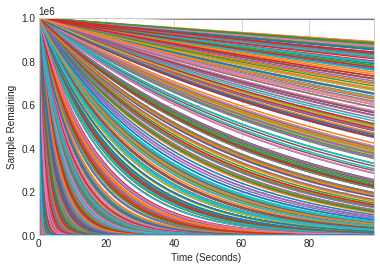

In [ ]:
y = df.drop(columns=['isotope', 'half-life'])
for row in range(1042):
  #plt.figure(figsize=(10,10))
  x1 = [(t) for t in np.arange(0, 100, 0.5)]
  y1 = list(y.iloc[row])
  plt.plot(x1, y1)
  plt.style.use('seaborn-whitegrid')
  plt.xlabel('Time (Seconds)')
  plt.ylabel('Sample Remaining')
  plt.xlim(0, 99)
  plt.ylim(0, 1000000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


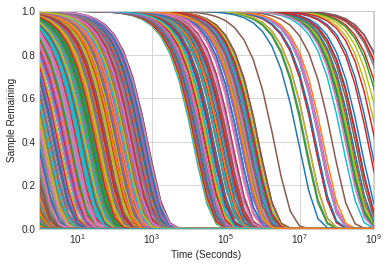

In [ ]:
plt.style.use('seaborn-whitegrid')
x1 = [(10**(t)) for t in np.arange(-20, 20, 0.25)]
plt.xlabel('Time (Seconds)')
plt.ylabel('Sample Remaining')
plt.xscale('log')
plt.xlim(0, 10**9)
plt.ylim(0, 1)
for row in range(1042):
  y1 = list(y.iloc[row])
  plt.plot(x1, y1)
  #plt.show()